In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Pre & testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Models 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout


# metrics
from sklearn.metrics import confusion_matrix

# Project IIII : hackathon 

--- 

---

### Problem Statement:

What is the most effective model to identify the species of fish using weight, length, height, width of the fish? 

To identify the species of fish using the metrics of weight, length, height, width we have created 3 different models using various technics.
- we have used a Logistic Regression Model 
- we have used a Random Forest model
- we have created a Neural Network

#### Executive Summary:

Major fish distributors are looking to automate there system.  There goal is to have their fish shipped and sold before it ever leaves the boad. The fish weighed and measured automatically while still at sea, this data will be sent back to the offices where from this data the company will know what varieties of fish are in the ships hold and make arrangmets for it to be sold. They are looking to see if identifying the fish can be done via the weight, height, length, and width of the fish.  They are also look to see which model would give them the highest level of accuracy in doing this.

--- 

## Data input

In [2]:
df_raw = pd.read_csv('./data/Fish.csv')

In [3]:
df = df_raw.copy()

### Data Cleaning 

In [4]:
df.columns = df.columns.str.lower()
df_raw.columns = df.columns.str.lower()

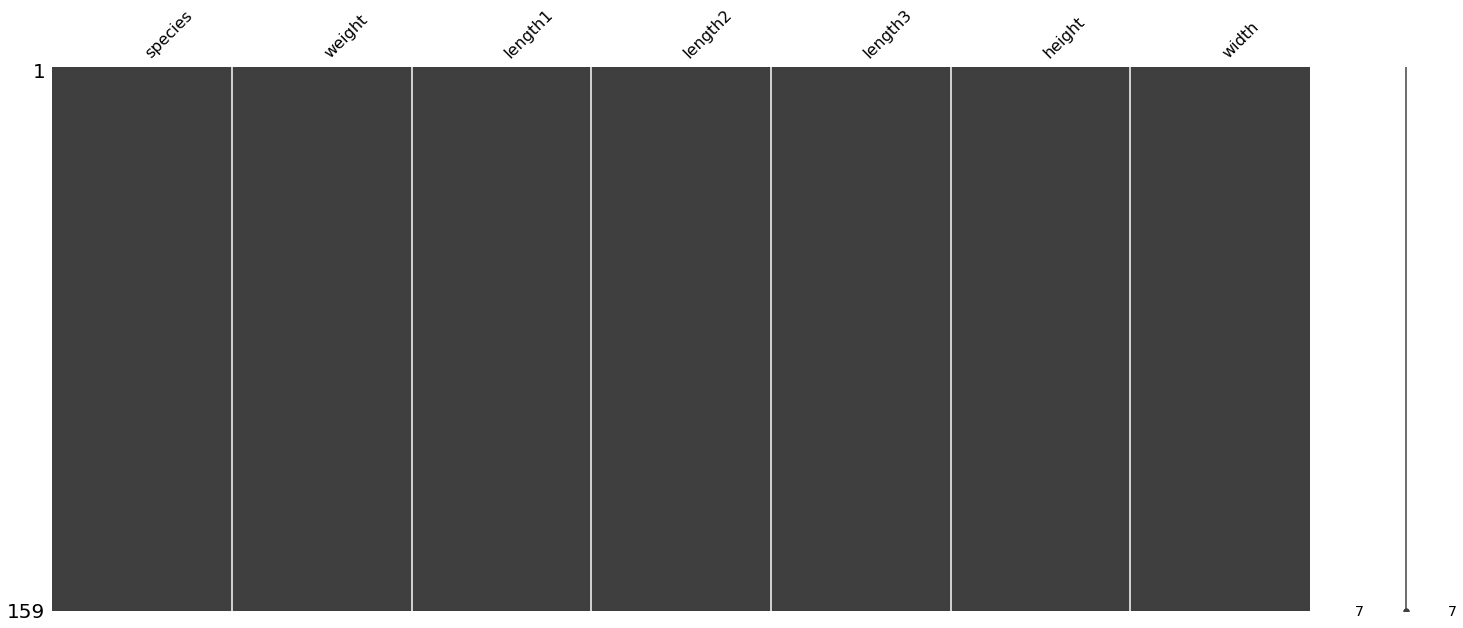

In [5]:
# looking for NaN
msno.matrix(df);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  159 non-null    object 
 1   weight   159 non-null    float64
 2   length1  159 non-null    float64
 3   length2  159 non-null    float64
 4   length3  159 non-null    float64
 5   height   159 non-null    float64
 6   width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe()

,weight,length1,length2,length3,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### EDA

In [9]:
df.shape

(159, 7)

In [10]:
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df['species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

#### Give int values to species names

In [12]:
df['species'] = df['species'].map({'Bream' : 1, 'Roach': 2,'Whitefish': 3,'Parkki':4,'Perch':5,'Pike':6, 'Smelt':7})

In [13]:
df.head(3)

,species,weight,length1,length2,length3,height,width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961


## Plots

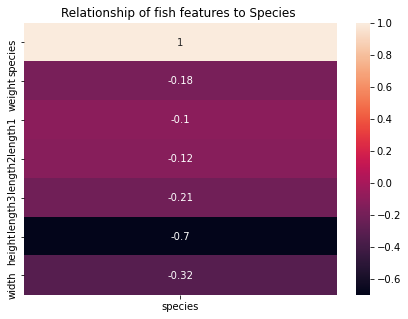

In [14]:
# corrolation map 
features = df

plt.figure(figsize = (7,5))
plt.title('Relationship of fish features to Species ')
sns.heatmap(features.corr()[['species']], annot = True);

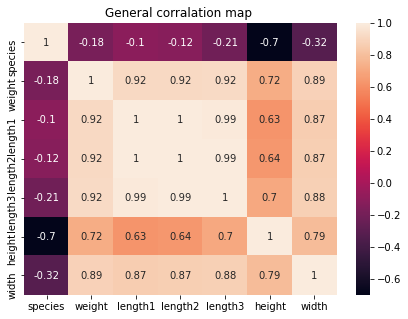

In [15]:
plt.figure(figsize = (7,5))
plt.title('General corralation map ')
sns.heatmap(features.corr(), annot = True);

Text(0.5, 1.0, 'Weight vs Length -1 ')

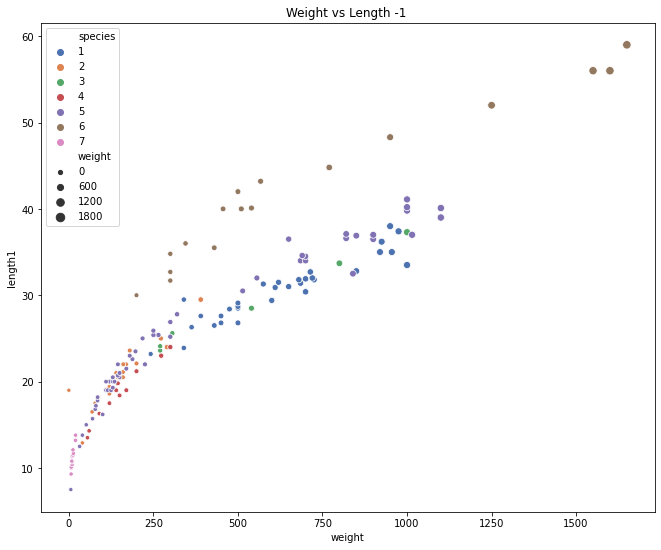

In [16]:
plt.figure(figsize = (11,9))
sns.scatterplot(data = df, x = 'weight', y = 'length1', hue = 'species', palette = 'deep', size = 'weight')


plt.title("Weight vs Length -1 ")

In [17]:
"""
     We can see some relationships between the fish classes as we plot the weight vs length1
"""

'\n     We can see some relationships between the fish classes as we plot the weight vs length1\n'

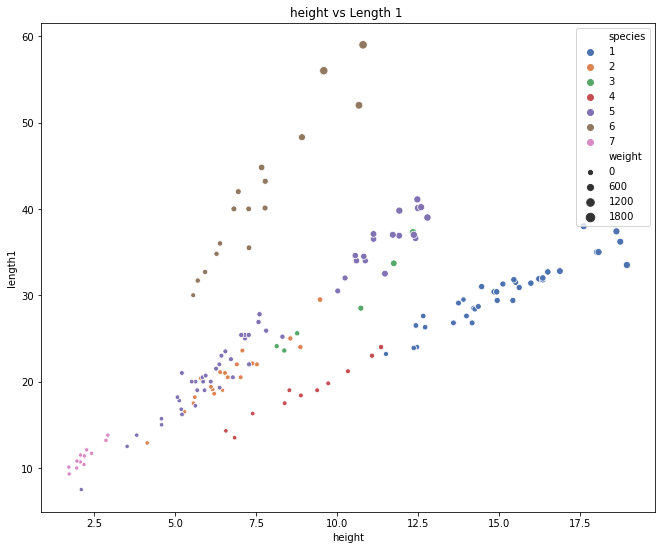

In [18]:
plt.figure(figsize = (11,9))
sns.scatterplot(data = df, x = 'height', y = 'length1', hue = 'species', palette = 'deep', size = 'weight')


plt.title("height vs Length 1 ");

In [19]:
"""
    when can see the differing classes of fish start to emerge even further as we plot by height and length1
"""

'\n    when can see the differing classes of fish start to emerge even further as we plot by height and length1\n'

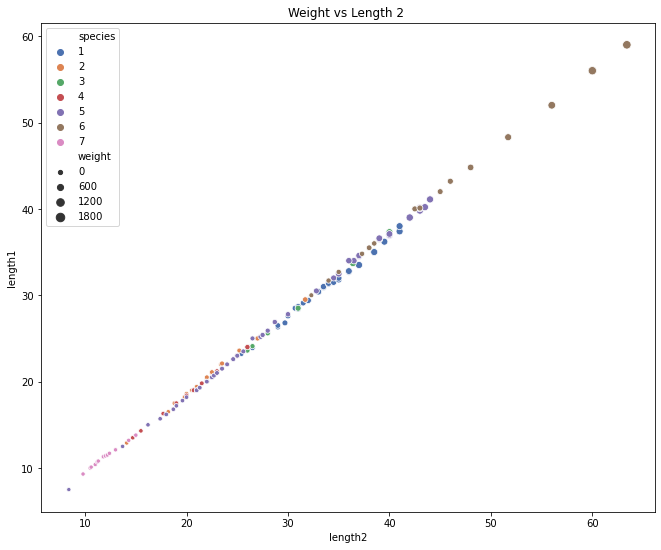

In [20]:
plt.figure(figsize = (11,9))
sns.scatterplot(data = df, x = 'length2', y = 'length1', hue = 'species', palette = 'deep', size = 'weight')


plt.title("Weight vs Length 2 ");

<Figure size 504x792 with 0 Axes>

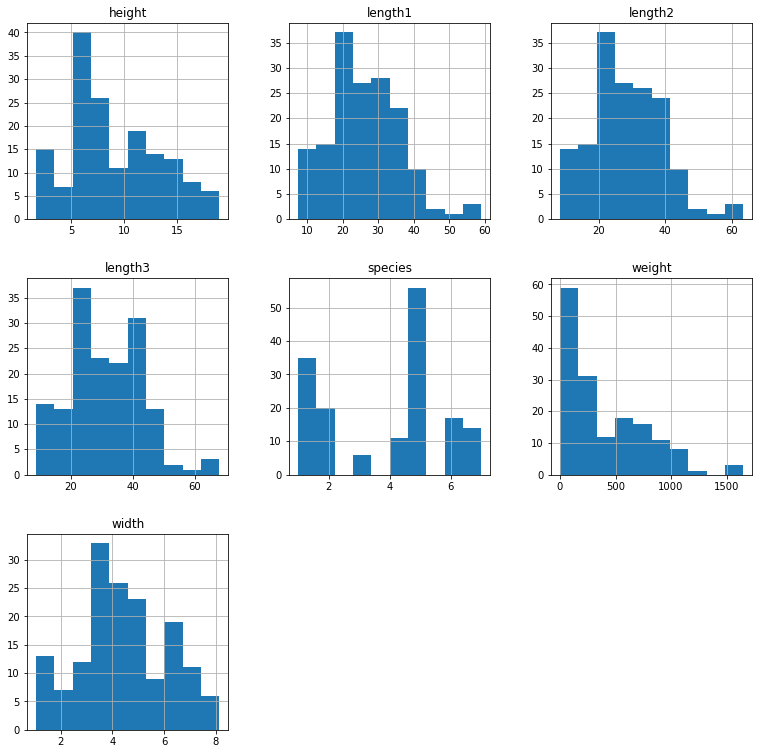

In [21]:
plt.figure(figsize = (7,11))
df.hist(figsize = (13,13));

In [22]:
"""
   Above is the distrobution for the six features (columns) of our data. Some of these features 
   are not normaly distributed.  
   We will use StandardScaler to create a normal distrobution within our features and between them 
    
    I did not see outlines within the data that needed to be delt with
"""

'\n   Above is the distrobution for the six features (columns) of our data. Some of these features \n   are not normaly distributed.  \n   We will use StandardScaler to create a normal distrobution within our features and between them \n\n'

---

# Creating Models 

#### Creating our BaseLine

In [23]:
df_raw['species'].value_counts(normalize=True)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: species, dtype: float64

In [24]:
df['species'].value_counts(normalize=True)

5    0.352201
1    0.220126
2    0.125786
6    0.106918
7    0.088050
4    0.069182
3    0.037736
Name: species, dtype: float64

#### Create X, y

In [25]:
X = df.drop('species', axis = 1)

In [26]:
X.shape

(159, 6)

In [27]:
y = df['species']

In [28]:
y.shape

(159,)

#### Train test Split



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 333)

In [30]:
X_train.shape

(119, 6)

In [31]:
y_train.shape

(119,)

In [32]:
X_test.shape

(40, 6)

In [33]:
y_test.shape

(40,)

#### Scale

In [34]:
ss = StandardScaler()

In [35]:
X_train_ss = ss.fit_transform(X_train, y_test)
X_test_ss = ss.transform(X_test)

---

## Models Logistic Regression

In [36]:
"""
    We are using Logistic Regression in creating our first model.
    - it is fast, simple and ushally gives us very good scoring results. 
"""

'\n    We are using Logistic Regression in creating our first model.\n    - it is fast, simple and ushally gives us very good scoring results. \n'

In [37]:
clf = LogisticRegression()
clf.fit(X_train_ss, y_train)


LogisticRegression()

In [38]:
clf.score(X_train_ss, y_train)

0.8067226890756303

In [39]:
clf.score(X_test_ss, y_test)

0.85

In [40]:
# Accuracy is 85 for test

In [41]:
preds = clf.predict(X_test_ss)

In [42]:
confusion_matrix(y_test, preds)

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  4]])

In [43]:
df_raw['species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: species, Length: 159, dtype: object

In [44]:
clf.coef_.shape

(7, 6)

In [45]:
# Below is a list of Coef_ for each of the 7 classes
df_clf_coef = pd.DataFrame(clf.coef_, columns  = X.columns)
df_clf_coef 

,weight,length1,length2,length3,height,width
0,-0.096105,-0.229804,-0.090807,0.631169,2.893956,-0.133403
1,-0.661947,-0.087051,-0.397342,0.400457,-0.477771,0.734745
2,0.608529,0.066493,0.155430,0.206995,-0.016859,0.561311
3,-0.370999,-0.574652,-0.613700,-0.584997,1.898085,-0.736945
4,1.090951,0.010747,0.269193,-1.339877,-1.875169,1.836394
5,-0.221932,1.328666,1.293993,1.278654,-1.144548,-0.805499
6,-0.348496,-0.514399,-0.616767,-0.592402,-1.277693,-1.456603


### GridSearch with logistic Regression

In [46]:
X_train.shape

(119, 6)

In [47]:
y_train.shape

(119,)

In [60]:
params = {'C': [.001, .01 , .1, 1, 10, 100]}

In [61]:
gs = GridSearchCV(LogisticRegression(max_iter = 100), params)

In [62]:
gs.fit(X_train_ss, y_train)

/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [63]:
gs.best_params_

{'C': 100}

In [64]:
gs.score(X_train_ss, y_train)

0.9663865546218487

In [116]:
gs.score(X_test_ss, y_test)

0.95

In [119]:
logistic_gs_score = gs.score(X_test_ss, y_test)

In [67]:
preds_logistic = gs.predict(X_test_ss)

In [68]:
confusion_matrix(y_test, preds_logistic)

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  4]])

In [71]:
# Findings


"""
 As we increase C (having less regulation) the accuracy is increasing.  
 When our C value was set to 1, our accuracy was .85, now at C = 100 it is .95 for our test score
 there is also not much differnce between our train and test score, train as .966 and test at .95, showing that there is very little overfitting happening 

"""

'\n As we increase C (having less regulation) the accuracy is increasing.  \n When our C value was set to 1, our accuracy was .85, now at C = 100 it is .95\n\n'

In [72]:
logistic_coef = pd.DataFrame(gs.cv_results_)
logistic_coef

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023354,0.000792,0.000666,0.000170,0.001,{'C': 0.001},0.375000,0.375000,0.333333,0.333333,0.347826,0.352899,0.018806,6
1,0.013653,0.000972,0.000510,0.000100,0.01,{'C': 0.01},0.541667,0.416667,0.458333,0.375000,0.478261,0.453986,0.056440,5
2,0.011661,0.001266,0.000452,0.000050,0.1,{'C': 0.1},0.708333,0.708333,0.750000,0.625000,0.652174,0.688768,0.044543,4
3,0.018203,0.001175,0.000543,0.000097,1,{'C': 1},0.791667,0.791667,0.833333,0.833333,0.739130,0.797826,0.034764,3
4,0.036056,0.001514,0.000527,0.000088,10,{'C': 10},0.791667,0.875000,0.916667,0.833333,0.826087,0.848551,0.043154,2
5,0.042096,0.001089,0.000619,0.000088,100,{'C': 100},0.916667,0.958333,0.875000,0.916667,0.869565,0.907246,0.032395,1


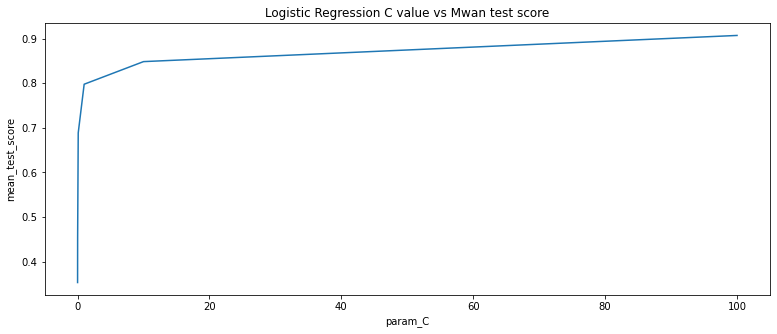

In [73]:
plt.figure(figsize = (13,5))
sns.lineplot(data = logistic_coef, x = 'param_C', y = 'mean_test_score', )
plt.title('Logistic Regression C value vs Mwan test score');

---

--- 

## Model - Random Forests

In [74]:
"""
    For our second model we are using random forest because it is usally an powerful 
    predicteing model.  It has a tendency out of the box to overfit. We are grid searching 
    over our models hyper peramters to accuire a model which has good accuracy. 
"""

'\n    For our second model we are using random forest because it is usally an powerful \n    predicteing model.  It has a tendency out of the box to overfit. We are grid searching \n    over our models hyper peramters to accuire a model which has good accuracy. \n'

In [75]:
## using the same train test split as logisitc regresson

In [76]:
forest = RandomForestClassifier()

In [77]:
param = {
    'n_estimators' : [50,100,500,1000],
    'max_depth' : [1, 2, 5, 7],
    #'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2,]
}

In [78]:
gs_forest  = GridSearchCV(forest, param, n_jobs= -1)

In [79]:
gs_forest.fit(X_train_ss, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 7], 'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 500, 1000]})

In [80]:
gs_forest.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000}

In [81]:
gs_forest.score(X_train_ss, y_train)

0.8487394957983193

In [82]:
gs_forest.score(X_test_ss, y_test)

0.825

In [83]:
forest_score = gs_forest.score(X_test_ss, y_test)

In [85]:
preds_forest = gs_forest.predict(X_test_ss)

In [87]:
confusion_matrix(y_test, preds_forest)

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  4]])

---

## Model - Neural Networks

In [88]:
"""
    We ran our classific problem through a Neural Network to see if it would 
    have dramatic improvment , beating .95 for accuracy, because of the sophistication of this model
    - we will do normalization within the NN, and not use Standard scaler

"""

'\n    We ran our classific problem through a Neural Network to see if it would \n    have dramatic improvment , beating .95 for accuracy, because of the sophistication of this model\n    - we will do normalization within the NN, and not use Standard scaler\n\n'

In [89]:
df.head(3)

,species,weight,length1,length2,length3,height,width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961


In [90]:
X = df.drop('species', axis = 1)
y = df['species']

In [91]:
X.shape[1]

6

In [92]:
y.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [93]:
# one hot encode target values
y = tf.keras.utils.to_categorical(y)

In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify = y, random_state = 333)

In [95]:
X_train2.shape

(119, 6)

In [96]:
y_train2.shape

(119, 8)

In [97]:
X_test2.shape

(40, 6)

In [98]:
y_test2.shape

(40, 8)

In [99]:
model = Sequential([
    layers.Input(shape=(X_train2.shape[1], )),
    layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    #layers.Dropout(.3),
    layers.Dense(8, activation='softmax')
])

In [100]:
model.compile(
    loss='categorical_crossentropy',
    
    optimizer='adam',
    
    metrics=['accuracy', 'Recall']
)

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
Total params: 1,920
Trainable params: 1,908
Non-trainable params: 12
_________________________________________________________________


In [102]:
history = model.fit(X_train2, y_train2, epochs=150, batch_size=None, validation_data=(X_test2, y_test2), verbose = 0)

In [103]:
model.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8750 - recall: 0.8250


[0.38033539056777954, 0.875, 0.824999988079071]

In [107]:
loss, NN_accuracy_score , recall = model.evaluate(X_test2, y_test2)
NN_accuracy_score

2/2 [==============================] - 0s 932us/step - loss: 0.3803 - accuracy: 0.8750 - recall: 0.8250


0.875

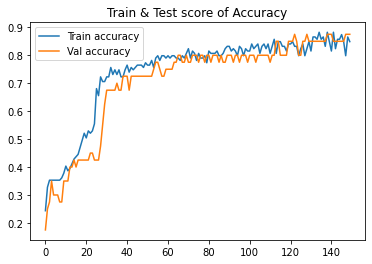

In [105]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('Train & Test score of Accuracy')
plt.legend();

In [ ]:
"""
  Through usinga Neural network we have achived an accuracy of 0.875
  
  when we look at the graphed out put of accuracy we notice that our scores are very jagged
  
  During creation of the model we both tried a variety of nodes 3 - 5 and
      node values of 128, 64, 32, 16.  We found that 3 nodes (not including softmax) layers gave 
      the best results.  
  We also experemented with using dropout layers and found that they could only be used very sparingly because they added 
      jagged steps within the accuracy graph.
      
   Our conclution is that though the results are pretty good they are not as good as the simple logistic regression
"""

---

---

# Conclusion

#### Scores from above


In [223]:
logistic_gs_score

0.925

In [109]:
forest_score

0.825

In [110]:
 NN_accuracy_score 

0.875

Text(0.5, 1.0, 'Accuracy Scores')

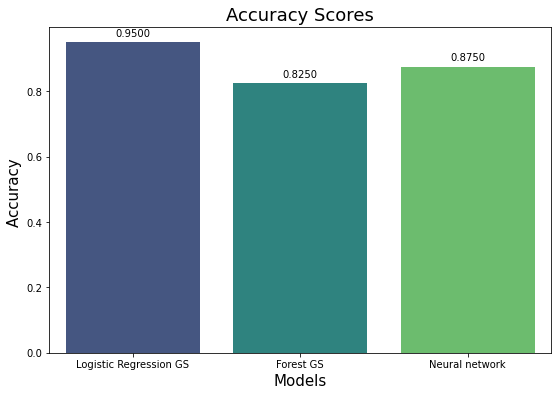

In [120]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = ['Logistic Regression GS', 'Forest GS','Neural network'],
            y = [logistic_gs_score , forest_score, NN_accuracy_score], 
           
            palette='viridis');

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                  (p.get_x()+ p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy ", size=15)
plt.title("Accuracy Scores", size=18)

#### Conclution

In conclution, it is possible to identiy a fish species by the weight, height, length, and width.  In doing so Logistic Regression with a HyperPeramter of C = 100 gives extreally accurate results.  Returning an accuracy score of .95.  